In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from env import user, password, host
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read in the csv
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
#get a quick look at the df
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Initital Thoughts
#### The data frame is a collection of medical measurements that directly influence whether or not a person has diabetes.  Domain background knowledge helps with this df.  The more pregnancies, the higher probability you will have gestastional diabetes that may resolve after pregnancy.  Glucose measurements below 99 may indicate that you are not diabetic, but prediabetic.  If you have diabetes, it strains your kidneys, which makes your blood pressure rise.  A physical symptom of diabetics is thickening of the skin around the neck and it darkens it, too. The insulin measurement indicates how much insulin is in your blood test and higher the number the higher the chance of diabetes..  The same with BMI, high is bad,  The Diabetes Pedigree Function is a function which scores likelihood of diabetes based on family history, so higher numbers indicate that you may more predisposed to diabetes.

### Exploring this df will help us  to see which of the measurement has a high(or higher) correlation to the outcome.

### H0- The target variable, outcome,  has no exact or actual relationship between the variables.

### Ha- The target variable, outcome, has a relationship between the variables

In [4]:
#see shape (rows and columns), column names, non null counts and datat types
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# looks at math stats
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# used to copy the lower case column names for the renaming of columns
diabetes_df.columns.str.lower()

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [7]:
# rename lower case and insert _ for separation of words in column names for better readability and easy manipulations of columns
diabetes_df=diabetes_df.rename(columns={'Pregnancies': 'pregnancies',
                          'Glucose':'glucose',
                          'BloodPressure':'blood_pressure',
                          'SkinThickness':'skin_thickness',
                          'Insulin':'insulin',
                          'BMI':'bmi',
                          'DiabetesPedigreeFunction': 'diabetes_pedigree_function',
                          'Age':'age',
                          'Outcome': 'outcome',
                          })

In [8]:
# making sure they are now renamed
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### checking for outliers

In [9]:
numeric_col = ['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree_function','age']

<AxesSubplot:>

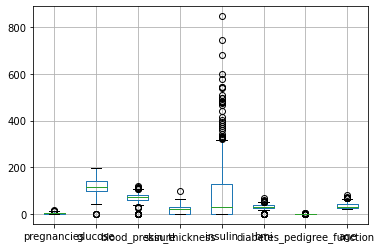

In [10]:
diabetes_df.boxplot(numeric_col)

<AxesSubplot:xlabel='pregnancies'>

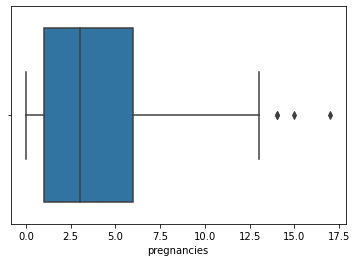

In [11]:
sns.boxplot(x = 'pregnancies', data = diabetes_df)

<AxesSubplot:xlabel='glucose'>

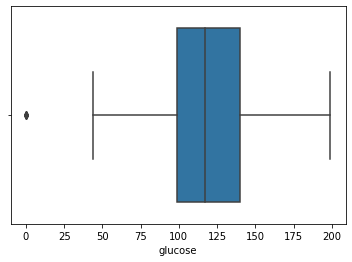

In [12]:
sns.boxplot(x = 'glucose', data = diabetes_df)

<AxesSubplot:xlabel='blood_pressure'>

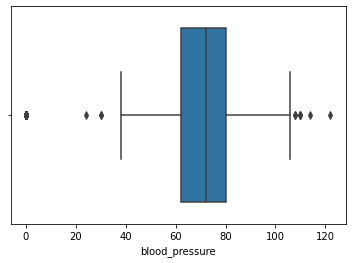

In [13]:
sns.boxplot(x = 'blood_pressure', data = diabetes_df)

<AxesSubplot:xlabel='skin_thickness'>

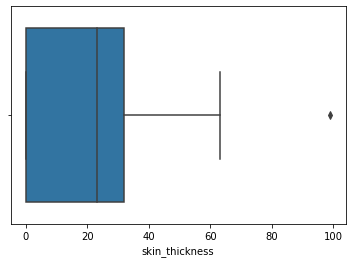

In [14]:
sns.boxplot(x = 'skin_thickness', data = diabetes_df)

<AxesSubplot:xlabel='insulin'>

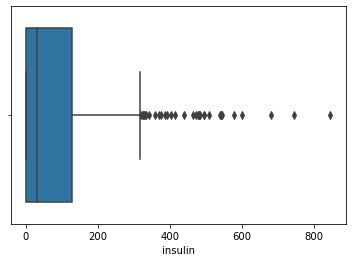

In [15]:
sns.boxplot(x = 'insulin', data = diabetes_df)

<AxesSubplot:xlabel='bmi'>

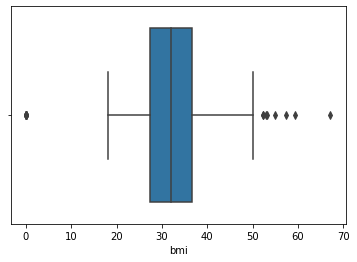

In [16]:
sns.boxplot(x = 'bmi', data = diabetes_df)

<AxesSubplot:xlabel='diabetes_pedigree_function'>

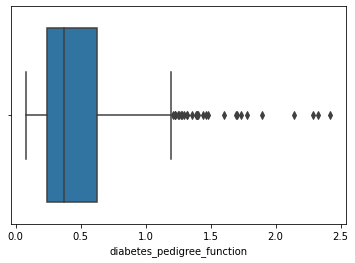

In [17]:
sns.boxplot(x = 'diabetes_pedigree_function', data = diabetes_df)

<AxesSubplot:xlabel='age'>

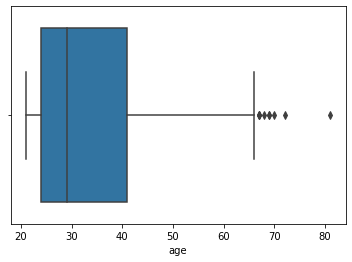

In [18]:
sns.boxplot(x = 'age', data = diabetes_df)

In [19]:
for x in ['pregnancies']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [20]:
for x in ['glucose']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [21]:
for x in ['blood_pressure']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [22]:
for x in ['skin_thickness']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [23]:
for x in ['insulin']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [24]:
for x in ['bmi']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [25]:
for x in ['diabetes_pedigree_function']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [26]:
for x in ['age']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    IQR = q75-q25
 
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

In [27]:
diabetes_df.isnull().sum()

pregnancies                    4
glucose                        5
blood_pressure                45
skin_thickness                 1
insulin                       34
bmi                           19
diabetes_pedigree_function    29
age                            9
outcome                        0
dtype: int64

In [28]:
diabetes_df = diabetes_df.dropna(axis = 0)

In [29]:
diabetes_df.isnull().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [30]:
diabetes_df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 639 non-null    float64
 1   glucose                     639 non-null    float64
 2   blood_pressure              639 non-null    float64
 3   skin_thickness              639 non-null    float64
 4   insulin                     639 non-null    float64
 5   bmi                         639 non-null    float64
 6   diabetes_pedigree_function  639 non-null    float64
 7   age                         639 non-null    float64
 8   outcome                     639 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 49.9 KB


In [31]:
# Count number of zeros in all columns of Dataframe
for column_name in diabetes_df.columns:
    column = diabetes_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pregnancies  is :  88
Count of zeros in column  glucose  is :  0
Count of zeros in column  blood_pressure  is :  0
Count of zeros in column  skin_thickness  is :  179
Count of zeros in column  insulin  is :  307
Count of zeros in column  bmi  is :  0
Count of zeros in column  diabetes_pedigree_function  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  outcome  is :  439


# Zero
### no measurements or zero?
### too many zeroes in insulin... 0=death

# Okeedokee, we got to know the data a bit, let's visualize the column data one by one and then ask some questions and make some visualizations!

### Visualize Univariate Distributions

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'skin_thickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetes_pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'outcome'}>]], dtype=object)

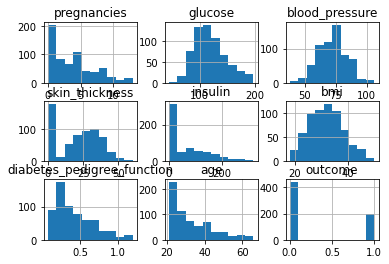

In [32]:
# use pandas hist()
diabetes_df.hist()

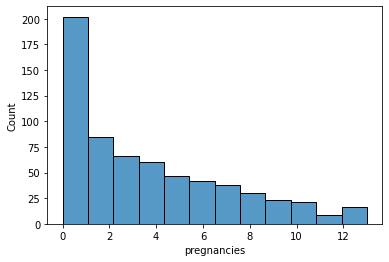

In [33]:
# using seaborn, create basic histograms for each column
sns.histplot(data=diabetes_df, x="pregnancies")
plt.show()

In [34]:
diabetes_df.pregnancies.value_counts()

1.0     114
0.0      88
2.0      85
3.0      66
4.0      60
5.0      47
6.0      42
7.0      38
8.0      30
9.0      23
10.0     21
11.0      9
13.0      8
12.0      8
Name: pregnancies, dtype: int64

#### Only 88 people had no pregnancies, which means the rst of the patients are femle. At least 4 pregnancies through childbearing age may be a potential risk factor for diabetes in postmenopausal women without a history of gestational diabetes.

In [35]:
# need to have a column with bins: 0 pregancies, 1-3 pregnancies, 4 or more

In [36]:

labels =[0, 1, 2]
diabetes_df['pregnancies_binned'] = pd.cut(diabetes_df['pregnancies'], bins=[0,.9,4,16],labels=labels, include_lowest=True)
diabetes_df.head(25)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1,1
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0,1
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1,2
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,2
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1,0


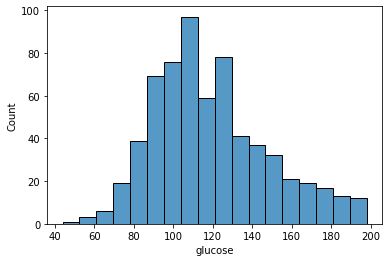

In [37]:
sns.histplot(data=diabetes_df, x="glucose")
plt.show()

In [38]:
diabetes_df.glucose.value_counts()

100.0    15
99.0     15
111.0    13
125.0    13
106.0    13
         ..
57.0      1
44.0      1
62.0      1
160.0     1
190.0     1
Name: glucose, Length: 132, dtype: int64

#### plasma glucose concentration at 2 hours in an oral glucose tolerance test.
##### At 2 hours, a blood sugar level of 140 mg/dL or lower is considered normal, 140 to 199 mg/dL indicates you have prediabetes, and 200 mg/dL or higher indicates you have diabetes.

In [39]:
# bin the glucose
labels =[0, 1, 2]
diabetes_df['glucose_binned'] = pd.cut(diabetes_df['glucose'], bins=[0,140,199,500],labels=labels, include_lowest=True)
diabetes_df.head(25)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1,1,0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0,1,0
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1,2,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,2,1
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1,0,0


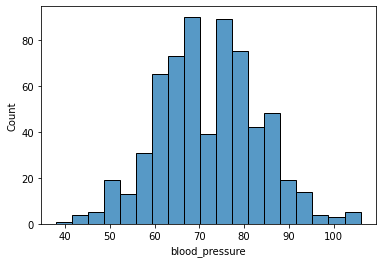

In [40]:
sns.histplot(data=diabetes_df, x="blood_pressure")
plt.show()

In [41]:
diabetes_df.blood_pressure.value_counts()

70.0     50
74.0     48
68.0     40
78.0     40
72.0     39
64.0     38
80.0     35
76.0     34
60.0     34
62.0     30
66.0     28
88.0     23
84.0     21
82.0     21
86.0     20
58.0     20
90.0     19
54.0     11
56.0     11
50.0     10
52.0      9
92.0      8
65.0      7
75.0      7
85.0      5
94.0      5
44.0      4
48.0      4
96.0      3
106.0     3
55.0      2
104.0     2
100.0     2
95.0      1
46.0      1
102.0     1
61.0      1
98.0      1
38.0      1
Name: blood_pressure, dtype: int64


#### diabetes puts a strain on the kidneys which is evident when measuring blood pressure.  

#### high blood pressure:
#### 90 mm Hg or greater diastolic pressure

#### prehypertension:
#### 80 mm Hg – 89 mm Hg diastolic pressure

#### normal blood pressure:
#### Less than 80 mm Hg diastolic pressure

In [42]:
#bin the blood pressure
labels =[0, 1, 2]
diabetes_df['bp_binned'] = pd.cut(diabetes_df['blood_pressure'], bins=[0,80,89,300],labels=labels, include_lowest=True)
diabetes_df.head(25)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned,bp_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2,1,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1,0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2,0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1,1,0,0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0,1,0,2
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1,2,1,0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,2,1,0
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1,0,0,1


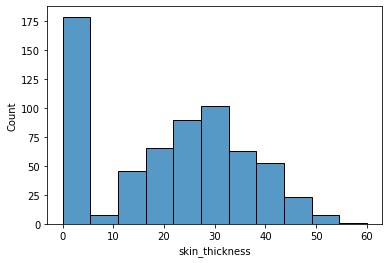

In [43]:
sns.histplot(data=diabetes_df, x="skin_thickness")
plt.show()

In [44]:
 diabetes_df.skin_thickness.value_counts()

0.0     179
32.0     29
27.0     22
30.0     22
28.0     19
23.0     18
18.0     18
31.0     17
40.0     16
39.0     16
26.0     15
25.0     15
19.0     15
29.0     15
33.0     14
17.0     14
22.0     13
36.0     13
37.0     13
15.0     13
41.0     11
13.0     10
20.0     10
35.0     10
21.0      9
34.0      8
46.0      7
24.0      7
12.0      7
42.0      6
11.0      6
10.0      5
14.0      5
38.0      5
16.0      5
45.0      5
43.0      4
48.0      3
47.0      3
50.0      3
44.0      3
8.0       2
49.0      2
52.0      2
54.0      2
7.0       1
51.0      1
60.0      1
Name: skin_thickness, dtype: int64

#### Digital sclerosis, skin thickening is more prevalent in type 1, not type 2 .  But if the type 2 diabetes is uncontrolled, then it can be a symptom.

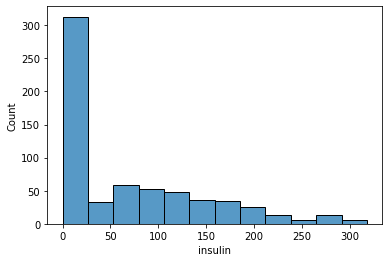

In [45]:
sns.histplot(data=diabetes_df, x="insulin")
plt.show()

In [46]:
 diabetes_df.insulin.value_counts()

0.0      307
105.0     11
140.0      9
130.0      8
120.0      8
        ... 
249.0      1
228.0      1
43.0       1
108.0      1
112.0      1
Name: insulin, Length: 148, dtype: int64

#### Chronic insulin resistance and hyperinsulinemia can result in chronic high blood sugar (hyperglycemia), which leads to prediabetes and Type 2 diabetes, so the higher the number the more predisposed to diabetes.  This measurement is a two-hour serum insulin (mu U/ml) measurement.   A normal measurement of free insulin is less than 17 mcU/mL.  2 hour after glucose administration.  Normal insulin levels should be between 16 and 166 mIU/L of blood 2 hours after ingesting glucose


In [47]:
#bin the insulin
labels =[0, 1, 2]
diabetes_df['insulin_binned'] = pd.cut(diabetes_df['insulin'], bins=[0,16,166,400],labels=labels, include_lowest=True)
diabetes_df.head(25)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned,bp_binned,insulin_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2,1,0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1,0,0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2,1,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,0,0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2,0,0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1,1,0,0,1
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0,1,0,2,0
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1,2,1,0,0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,2,1,0,2
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1,0,0,1,2


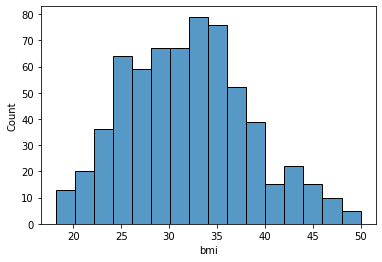

In [48]:
sns.histplot(data=diabetes_df, x="bmi")
plt.show()

In [49]:
diabetes_df.bmi.value_counts()

31.6    12
32.0    11
31.2    10
30.8     9
32.8     9
        ..
19.4     1
44.1     1
45.2     1
41.8     1
46.3     1
Name: bmi, Length: 227, dtype: int64

#### BMI is a complicated number that may indicate a number of comorbidities.  So again a higher number predisposses you to diabtetes. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more)

In [50]:
#bin the bmi
labels =[0, 1, 2, 3]
diabetes_df['bmi_binned'] = pd.cut(diabetes_df['bmi'], bins=[0,18.4,24.9,29.9,60],labels=labels, include_lowest=True)
diabetes_df.head(25)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned,bp_binned,insulin_binned,bmi_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2,1,0,0,3
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1,0,0,0,2
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2,1,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,0,0,1,2
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2,0,0,0,2
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1,1,0,0,1,3
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0,1,0,2,0,3
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1,2,1,0,0,3
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,2,1,0,2,2
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1,0,0,1,2,3


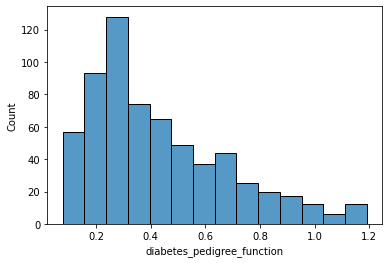

In [51]:
sns.histplot(data=diabetes_df, x="diabetes_pedigree_function")
plt.show()

In [52]:
diabetes_df.diabetes_pedigree_function.value_counts()

0.254    6
0.258    5
0.268    5
0.259    5
0.263    4
        ..
1.136    1
0.078    1
1.101    1
0.997    1
0.171    1
Name: diabetes_pedigree_function, Length: 442, dtype: int64

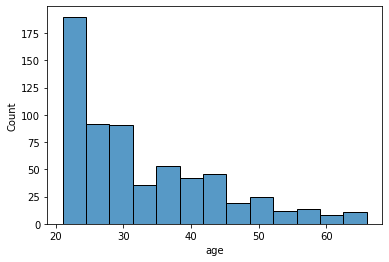

In [53]:
sns.histplot(data=diabetes_df, x="age")
plt.show()

In [54]:
diabetes_df.age.value_counts()

22.0    62
21.0    55
24.0    41
25.0    35
23.0    32
28.0    29
27.0    29
26.0    28
29.0    25
41.0    19
31.0    19
30.0    18
42.0    17
37.0    15
36.0    15
38.0    14
32.0    14
45.0    14
39.0    12
33.0    12
43.0    11
40.0    11
34.0    10
35.0     9
46.0     9
52.0     7
50.0     7
51.0     7
58.0     6
48.0     5
47.0     5
57.0     4
55.0     4
54.0     4
66.0     4
44.0     4
63.0     4
49.0     4
53.0     4
62.0     3
60.0     3
61.0     2
65.0     2
59.0     2
56.0     2
64.0     1
Name: age, dtype: int64

#### age is spread between 21-66, more patients are younger.  At least 4 pregnancies through childbearing age may be a potential risk factor for diabetes in postmenopausal women without a history of gestational diabetes.



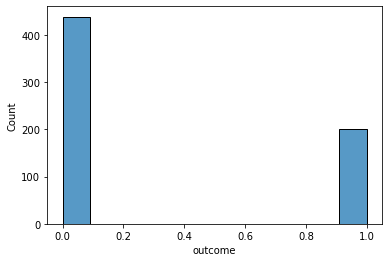

In [55]:
sns.histplot(data=diabetes_df, x="outcome")
plt.show()

In [56]:
diabetes_df.outcome.value_counts()

0    439
1    200
Name: outcome, dtype: int64

In [57]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned,bp_binned,insulin_binned,bmi_binned
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,2,1,0,0,3
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,1,0,0,0,2
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,2,1,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,0,0,1,2
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2,0,0,0,2


# non diabetics (maybe prediabetics make of about 2/3 of the sample population)

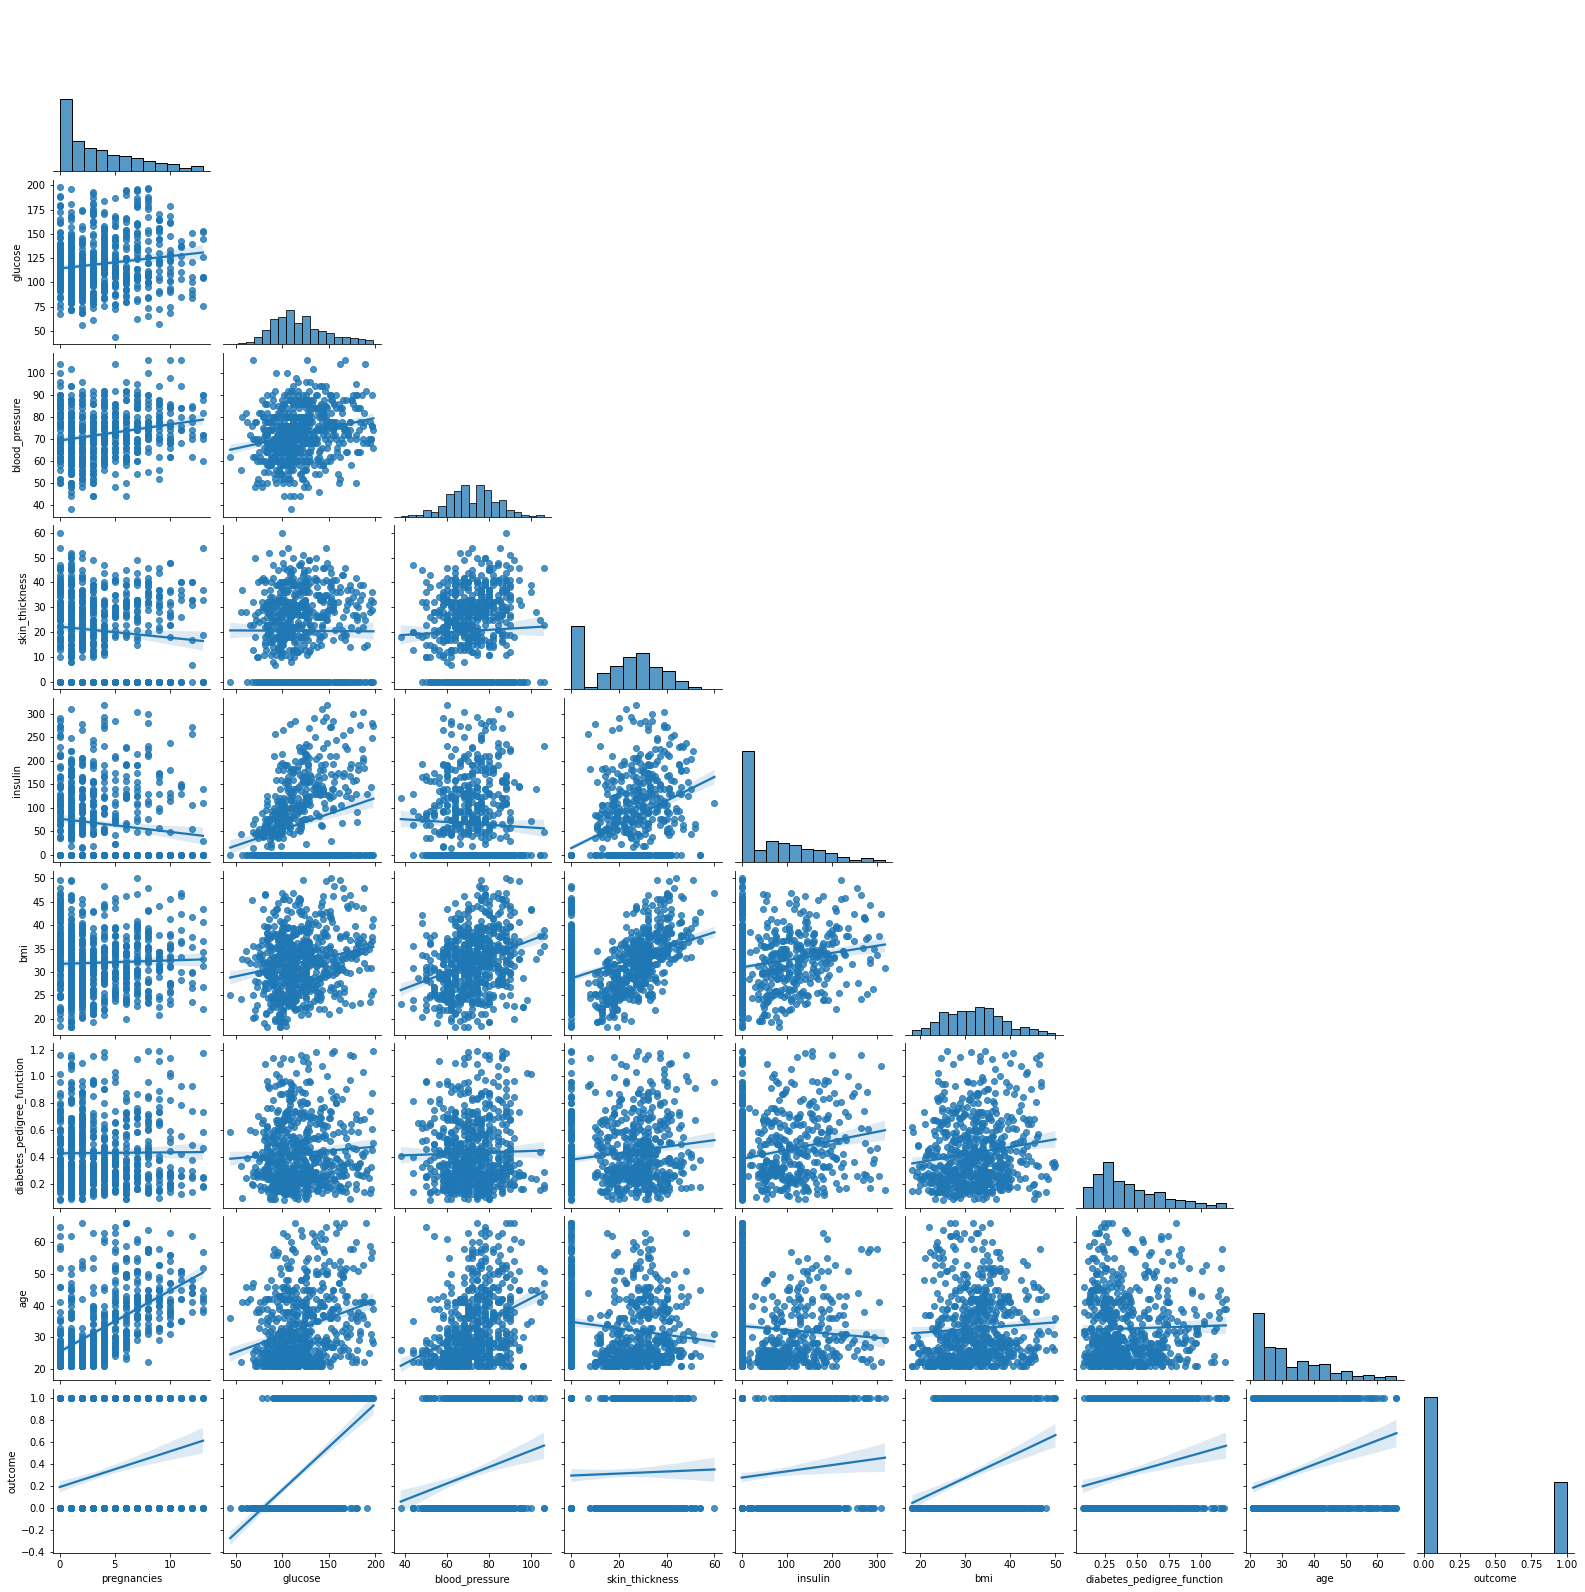

In [58]:
sns.pairplot(data=diabetes_df, kind="reg", corner=True)

### after exploring univariates, BUT before exploring bivariates, split into train, validate, test and only explore on train.

In [59]:
def split_diabetes(df):
    '''
    This function performs split on diabetes data, stratify outcome.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(diabetes_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=diabetes_df.outcome)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.outcome)
    return train, validate, test

#train, validate, test= split_diabetes(df) 

In [60]:
train, validate, test= split_diabetes(diabetes_df) 

In [61]:
train.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,pregnancies_binned,glucose_binned,bp_binned,insulin_binned,bmi_binned
71,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26.0,0,2,0,0,1,2
175,8.0,179.0,72.0,42.0,130.0,32.7,0.719,36.0,1,2,1,0,1,3
62,5.0,44.0,62.0,0.0,0.0,25.0,0.587,36.0,0,2,0,0,0,2
587,6.0,103.0,66.0,0.0,0.0,24.3,0.249,29.0,0,2,0,0,0,1
73,4.0,129.0,86.0,20.0,270.0,35.1,0.231,23.0,0,1,0,1,2,3


# bivariate analysis, comparing to columns to eachother

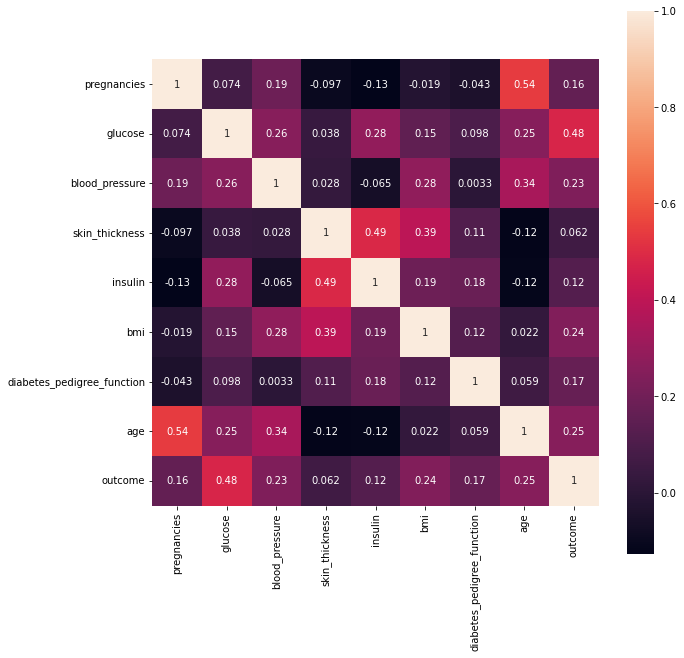

In [62]:
fig, ax = plt.subplots(figsize=(10,10))      
corr = train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# QUESTIONS???

### The data set does not report the sex, but out of all the data only 88 have never been pregnant.  This data set may be all female.  .  At least 4 pregnancies through childbearing age may be a potential risk factor for diabetes in postmenopausal women without a history of gestational diabetes.  
### Does have 4 or more pregnancies for older women  create a diabetic outcome?

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

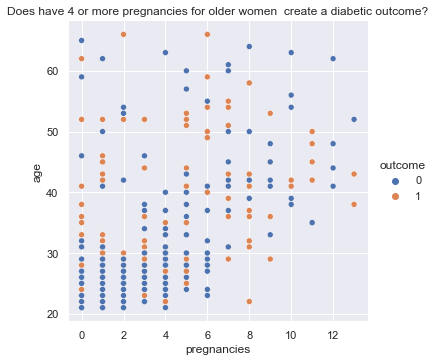

In [92]:
sns.relplot(x='pregnancies', y='age', hue='outcome', data=train).set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')
  

<AxesSubplot:xlabel='pregnancies', ylabel='age'>

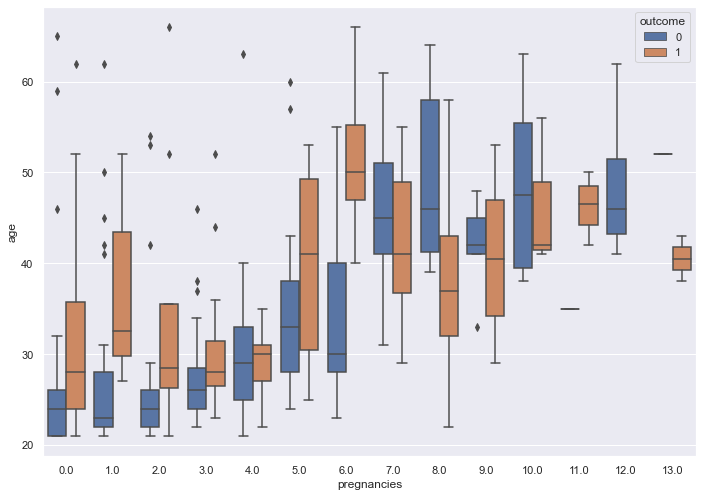

In [65]:
x = 'pregnancies'
y = 'age'
data = train

sns.boxplot(x=x,y=y,data=data ,hue= 'outcome').set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')


<AxesSubplot:xlabel='pregnancies', ylabel='age'>

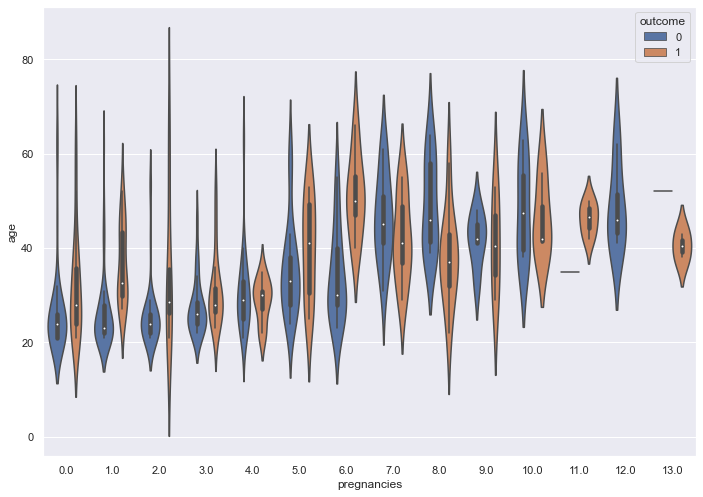

In [66]:
x = 'pregnancies'
y = 'age'
data = train
hue = 'outcome'
sns.violinplot(x=x,y=y,data=data, hue=hue).set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')

<AxesSubplot:xlabel='pregnancies', ylabel='age'>

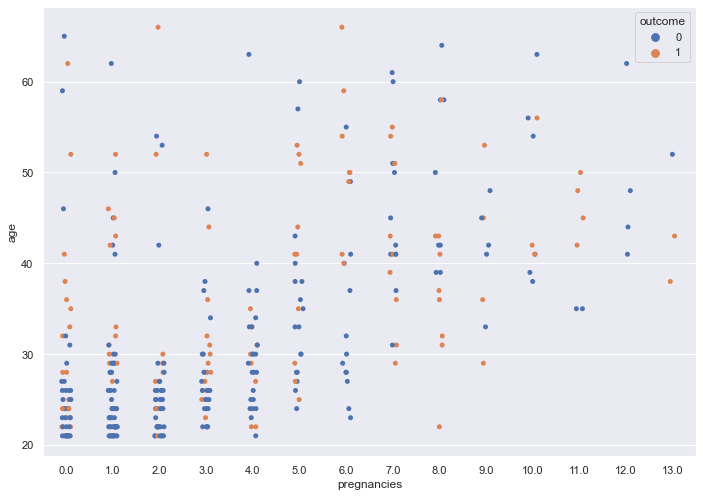

In [67]:
x = 'pregnancies'
y = 'age'
data = train
hue = 'outcome'
sns.stripplot(x=x,y=y,data=data, hue=hue).set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')


<AxesSubplot:xlabel='pregnancies', ylabel='age'>

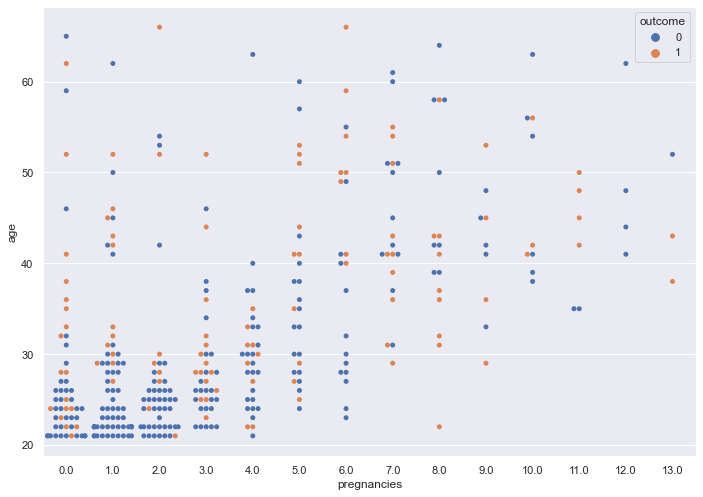

In [68]:
x = 'pregnancies'
y = 'age'
data = train
hue = 'outcome'
sns.swarmplot(x=x,y=y,data=data, hue=hue).set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')

<AxesSubplot:xlabel='pregnancies_binned', ylabel='age'>

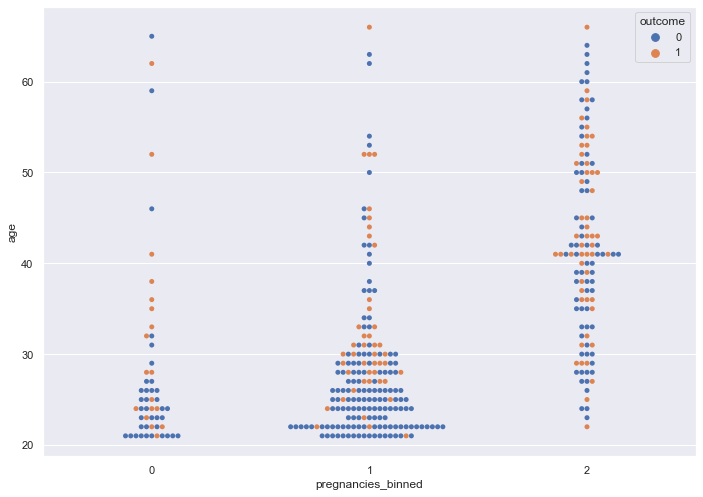

In [69]:
x = 'pregnancies_binned'
y = 'age'
data = train
hue = 'outcome'
sns.swarmplot(x=x,y=y,data=data, hue=hue).set(title='Does have 4 or more pregnancies for older women  create a diabetic outcome?')

### At 2 hours, a blood sugar level of 140 mg/dL or lower is considered normal, 140 to 199 mg/dL indicates you have prediabetes, and 200 mg/dL or higher indicates you have diabetes.
### Normal insulin levels should be between 16 and 166 mIU/L of blood 2 hours after ingesting glucose.  
### Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?


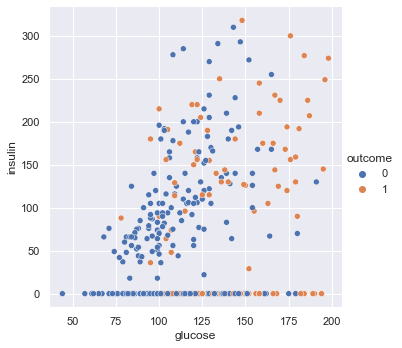

In [70]:
sns.relplot(x='glucose', y='insulin', hue='outcome', data=train).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

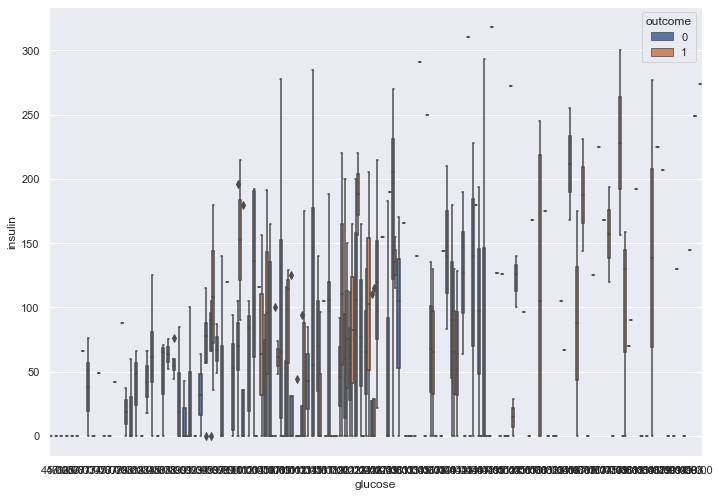

In [71]:
sns.boxplot(x='glucose', y='insulin', hue='outcome', data=train).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

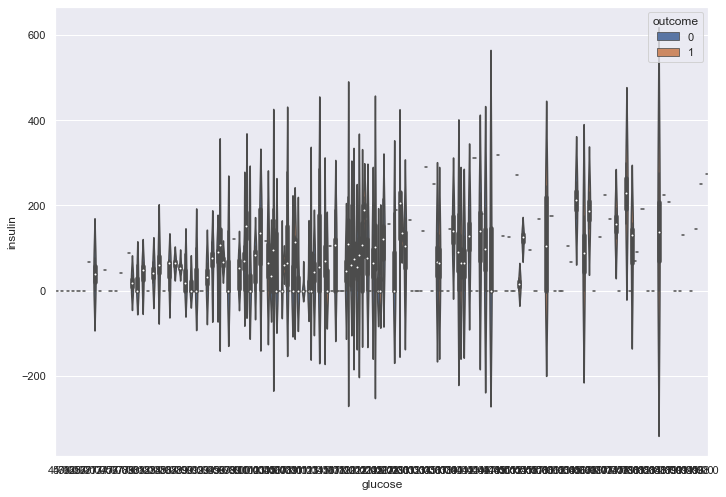

In [72]:
sns.violinplot(x='glucose', y='insulin', hue='outcome', data=train).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

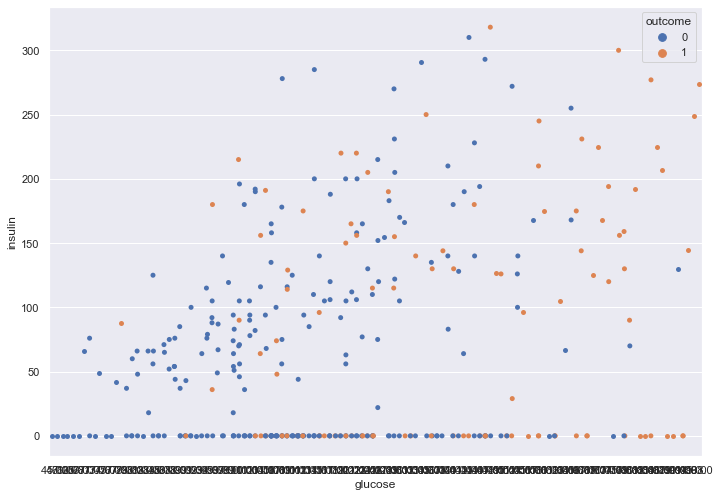

In [73]:
sns.stripplot(x='glucose', y='insulin', hue='outcome', data=train).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')


<AxesSubplot:xlabel='glucose', ylabel='insulin'>

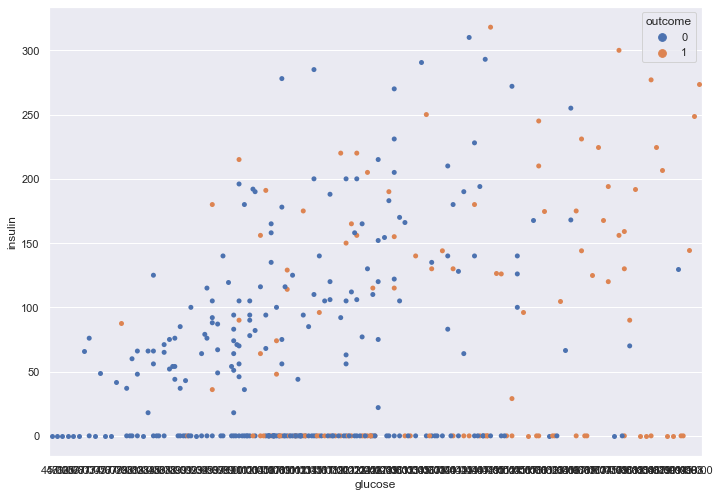

In [74]:
sns.swarmplot(x='glucose', y='insulin', hue='outcome', data=train).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')

<AxesSubplot:xlabel='glucose_binned', ylabel='age'>

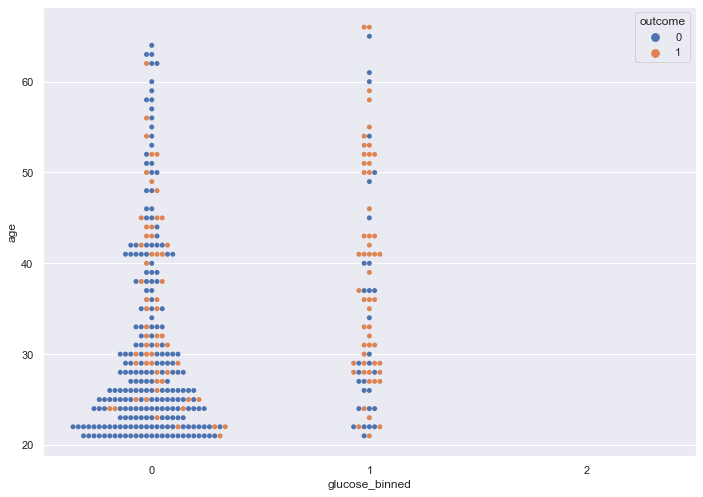

In [75]:
x = 'glucose_binned'
y = 'age'
data = train
hue = 'outcome'
sns.swarmplot(x=x,y=y,data=data, hue=hue).set(title='Is there a point with patients that have both a high blood glucose and serum insulin have of diabetes?')

### Does having both a high glucose and and high BMI have a reltionship with outcome? 

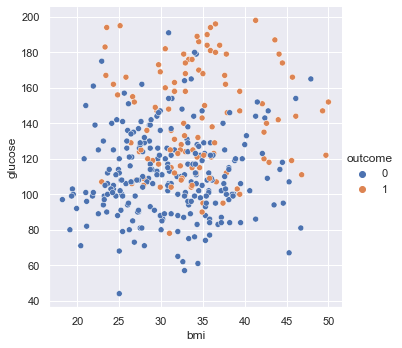

In [76]:
sns.relplot(x='bmi', y='glucose', hue='outcome', data=train).set(title='Does having both a high glucose and and high BMI have a reltionship with outcome? ')

<AxesSubplot:xlabel='bmi', ylabel='glucose'>

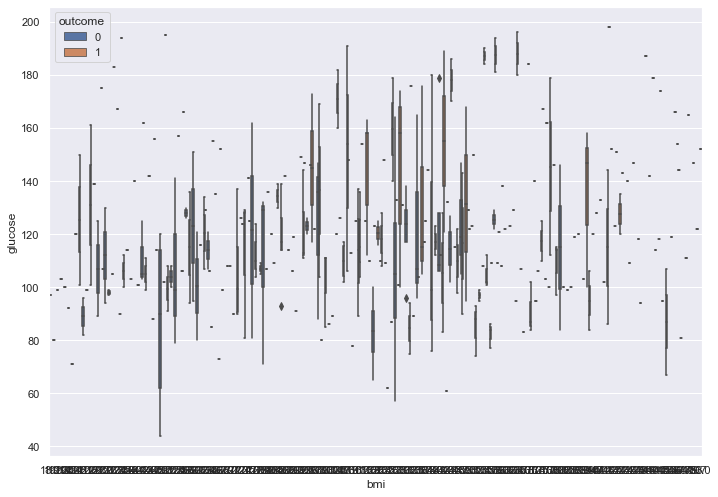

In [77]:
sns.boxplot(x='bmi', y='glucose', hue='outcome', data=train).set(title='Does having both a high glucose and and high BMI have a reltionship with outcome? ')

<AxesSubplot:xlabel='bmi', ylabel='glucose'>

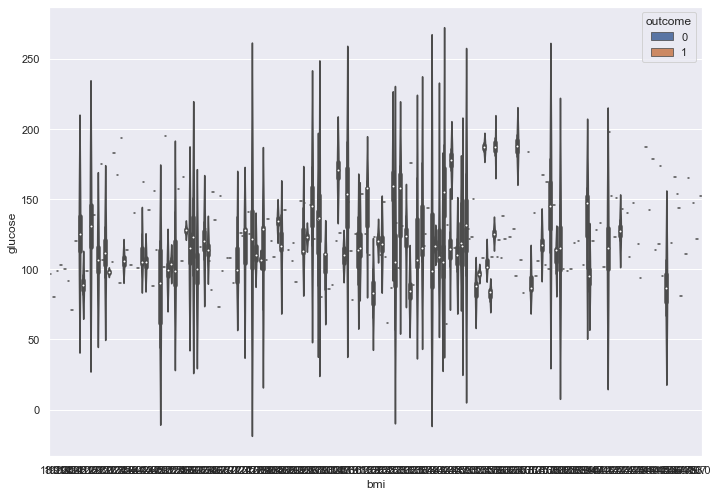

In [78]:
sns.violinplot(x='bmi', y='glucose', hue='outcome', data=train)

<AxesSubplot:xlabel='bmi', ylabel='glucose'>

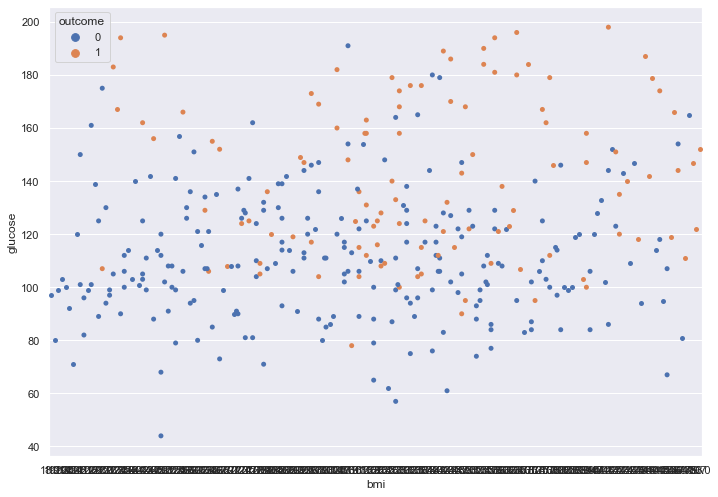

In [79]:
sns.swarmplot(x='bmi', y='glucose', hue='outcome', data=train)

<AxesSubplot:xlabel='bmi_binned', ylabel='age'>

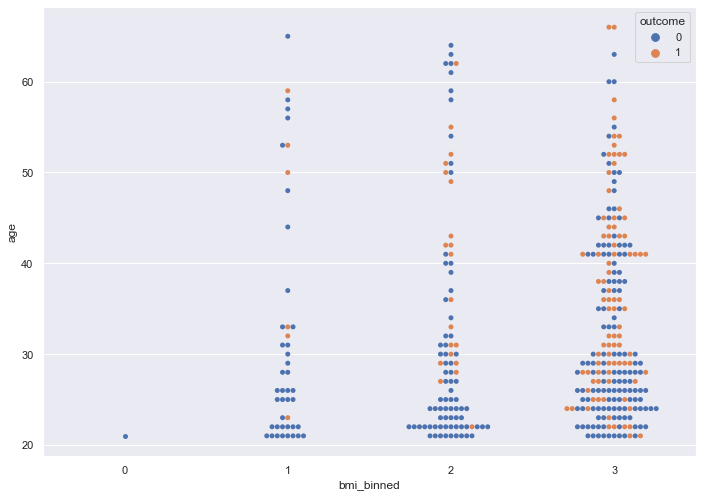

In [80]:
x = 'bmi_binned'
y = 'age'
data = train
hue = 'outcome'
sns.swarmplot(x=x,y=y,data=data, hue=hue)

### Skin thickness was significantly influenced by insulin level, but not glucose level. Taken together, the results of the present study showed that skin thickness may be a new predictor of the progression of diabetes.  Does skin thickness and high insulin level lead to diabetes?

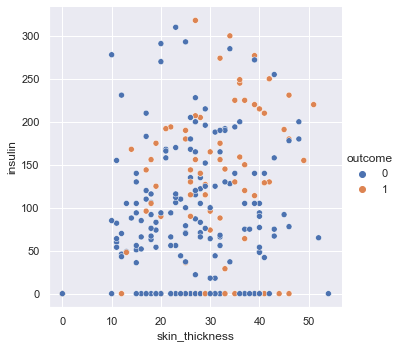

In [82]:
sns.relplot(x='skin_thickness', y='insulin', hue='outcome', data=train)

<AxesSubplot:xlabel='skin_thickness', ylabel='insulin'>

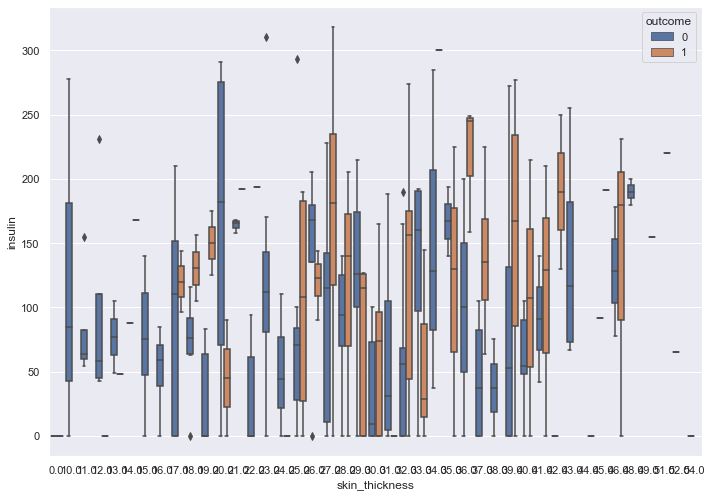

In [88]:
sns.boxplot(x='skin_thickness', y='insulin', hue='outcome', data=train)

<AxesSubplot:xlabel='skin_thickness', ylabel='insulin'>

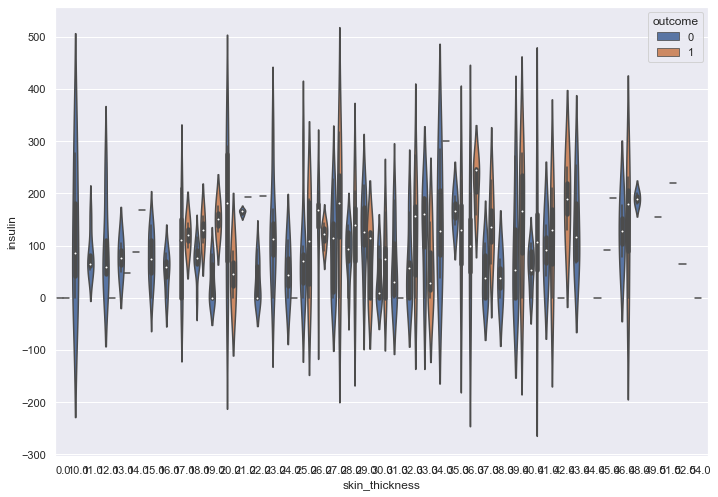

In [89]:
sns.violinplot(x='skin_thickness', y='insulin', hue='outcome', data=train)

<AxesSubplot:xlabel='skin_thickness', ylabel='insulin'>

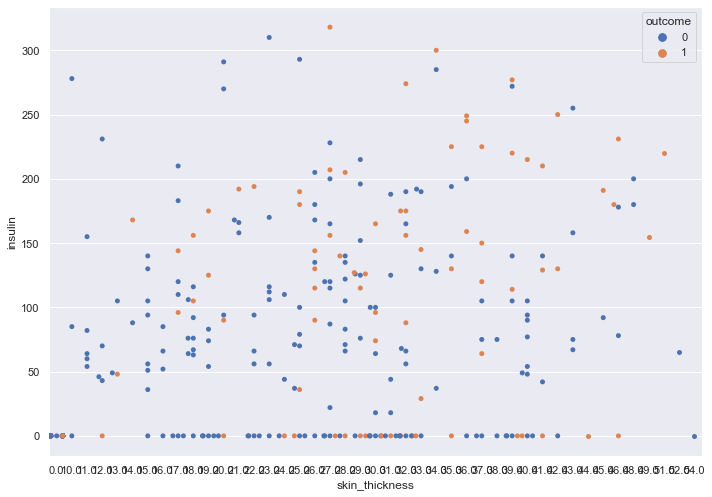

In [90]:
sns.swarmplot(x='skin_thickness', y='insulin', hue='outcome', data=train)

<AxesSubplot:xlabel='insulin_binned', ylabel='age'>

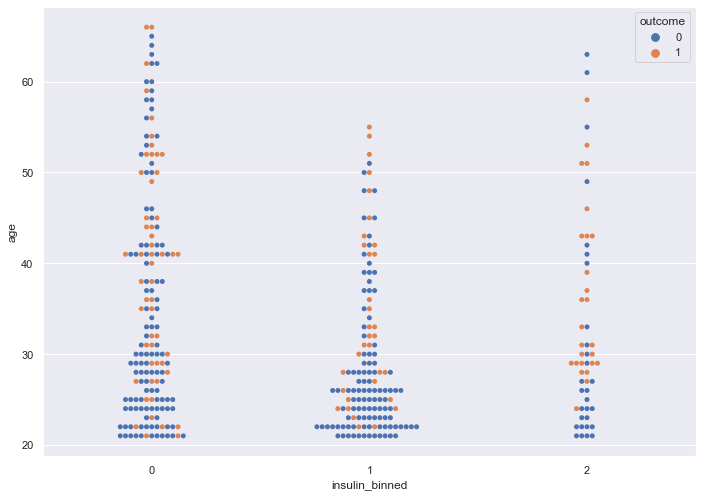

In [91]:
x = 'insulin_binned'
y = 'age'
data = train
hue = 'outcome'
sns.swarmplot(x=x,y=y,data=data, hue=hue)

In [81]:
how many groups are present, what types of data do i have, what is the question of interest.

SyntaxError: invalid syntax (110138936.py, line 1)

In [ ]:
visualization, with title being the question of interest, what are you trying to find

In [ ]:
public, diet

In [ ]:
# isolate or target variable and explore on train, 
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['outcome'])
y_train = train.outcome

X_validate = validate.drop(columns=['outcome'])
y_validate = validate.outcome

X_test = test.drop(columns=['outcome'])
y_test = test.outcome
